In [1]:
#Importing the packags
# !pip install --user -U nltk
# !pip install -U scikit-learn
import numpy as np
import pandas as pd
import re,string  # re vaneko regular expression 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords #stopword= kunai word sentence ma navayeni meaning dinxa vane testo word
from nltk.stem import PorterStemmer #steamer le root word patta lagauxa(playing = play)
from sklearn.feature_extraction.text import TfidfVectorizer #word lai number ma convert garne ani ajha futher preprocessing
from sklearn.pipeline import Pipeline #data lai algo ma rakhda kun kun step bata pass hunxa vanera vanne
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kusum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('bbc-text.csv', encoding = 'latin1')
df = df.sample(frac = 1) #suffle gareko same same data snagai huna sakxa tei vayera
df

,category,text
1761,sport,campese berates whingeing england former austr...
1680,business,europe asks asia for euro help european leader...
420,business,small firms hit by rising costs rising fuel ...
1778,business,water firm suez in argentina row a conflict be...
1611,sport,safin cool on wimbledon newly-crowned australi...
...,...,...
1210,business,us adds more jobs than expected the us economy...
485,sport,hantuchova in dubai last eight daniela hantuch...
2091,sport,collins named uk athletics chief uk athletics ...
667,tech,dvd copy protection strengthened dvds will be ...


In [3]:
#No of a categories
len(set(df['category']))  #set garyo vane unique category matra dinxa garena vane tya vako sabai duplicate category ni count  garxa

5

In [4]:
df.groupby('category').category.count()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: category, dtype: int64

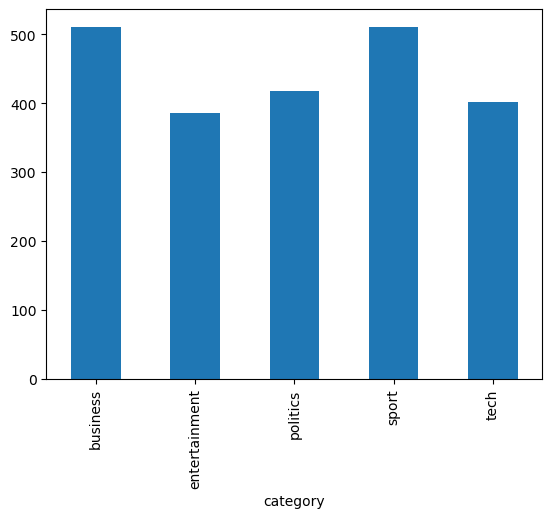

In [5]:
#Analyzing data
df.groupby('category').category.count().plot.bar()
plt.show()

In [6]:
#Data Preprocessing

In [7]:
# df['text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['text']]

In [8]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kusum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = "I am loving computing".split()
# [stemmer.stem(i) for i in data]
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")
# data

'i am love comput'

In [10]:
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("I am loving computing")

'i am love comput'

In [11]:
# Data Cleaning removing stopwords

In [12]:
news = ''
data = "I am loving computing".lower().split() #lower le small letter ma convert garxa
for i in data:
  if i not in words:
#       print(i)
    news = news + " " +i

news
#   print(i)


' loving computing'

In [13]:
df['text'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [14]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
df['text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['text']] #^ vaneko not
#mathi ko code lai short ma lekheko
df['text'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), df['text']))
# df['text'] = [" ".join(word.split() for word in df['text'] if word.lower() not in stopwords.words('english'))]
df

,category,text
1761,sport,campese berates whingeing england former austr...
1680,business,europe asks asia euro help european leaders sa...
420,business,small firms hit rising costs rising fuel mater...
1778,business,water firm suez argentina row conflict argenti...
1611,sport,safin cool wimbledon newly crowned australian ...
...,...,...
1210,business,us adds jobs expected us economy added jobs oc...
485,sport,hantuchova dubai last eight daniela hantuchova...
2091,sport,collins named uk athletics chief uk athletics ...
667,tech,dvd copy protection strengthened dvds harder c...


In [15]:
df.to_csv('cleaned_bbc_data.csv')

In [16]:
# from google.colab import drive
# drive.mount('/content/drive')

In [17]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
# df

In [18]:
# print(words)

In [19]:
# words = stopwords.words("nepali")
# words

In [20]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
# df

In [21]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['text']
Y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset


# #Creating Pipeline
#pipeline vaneko architecture nai ho
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression())])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
# with open('LogisticRegression.pickle', 'wb') as f:
#     pickle.dump(model, f)

In [22]:
X_test

979     budget set scene election gordon brown seek pu...
1518    jobs growth still slow us us created fewer job...
807     films war triumph sundance study united states...
1530    ford gains finance cars ford us car company re...
309     iraq advice claim sparks new row tories say mi...
                              ...                        
1738    golden economic period end ten years golden ec...
1139    britons growing digitally obese gadget lovers ...
1627    blair hope blunkett return events leading davi...
1911    honour uk games maker leading british computer...
284     anti tremor mouse stops pc shakes special adap...
Name: text, Length: 334, dtype: object

In [23]:
y_test

979          politics
1518         business
807     entertainment
1530         business
309          politics
            ...      
1738         business
1139             tech
1627         politics
1911             tech
284              tech
Name: category, Length: 334, dtype: object

In [24]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test)

# print(predict_news_cat)
print(accuracy_score(y_test,predict_news_cat))
# print('\n')
# print(predict_news_cat)

0.9610778443113772


In [25]:
# file = open('/content/news.txt','r')
# news = file.read()
# file.close()

news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)
# news_data_df
predict_news_cat = model.predict(news_data_df['predict_news']) #dataframe name ani kun key ni lekhne
print("Predicted news category = ",predict_news_cat[0])

Enter news = i like sports
Predicted news category =  sport


In [26]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(model.predict(X_test),ytest))

               precision    recall  f1-score   support

     business       0.95      0.95      0.95        87
entertainment       0.98      0.96      0.97        48
     politics       0.94      0.96      0.95        67
        sport       0.97      1.00      0.99        67
         tech       0.97      0.94      0.95        65

     accuracy                           0.96       334
    macro avg       0.96      0.96      0.96       334
 weighted avg       0.96      0.96      0.96       334

[[83  1  2  0  1]
 [ 0 46  0  0  1]
 [ 3  1 64  0  0]
 [ 0  0  0 67  2]
 [ 1  0  1  0 61]]


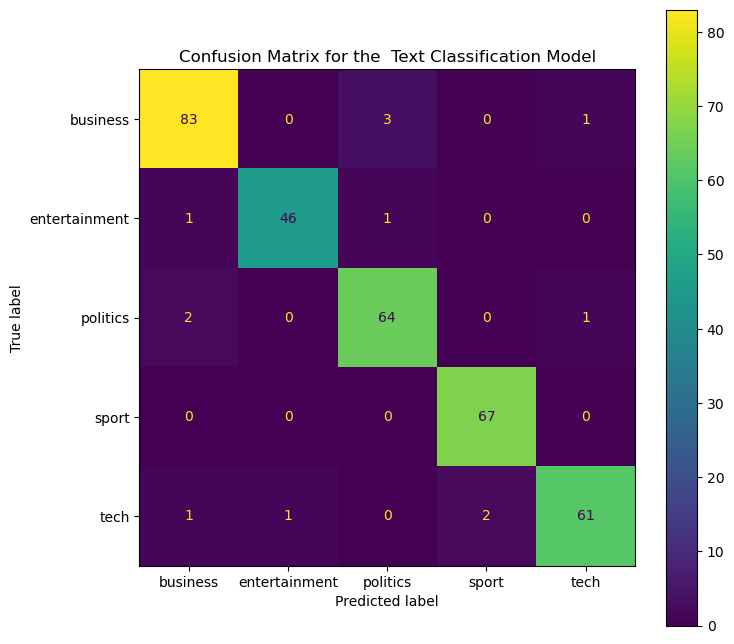

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,model.predict(X_test))
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['business','entertainment','politics','sport','tech']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Text Classification Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);